# Show the dataframe shape

In [1]:
import numpy as np
import pandas as pd

In [2]:
ls

Customer Analysis Round 5 (friday).ipynb
marketing_customer_analysis.csv
marketing_customer_analysis.xlsx


In [3]:
df=pd.read_excel('marketing_customer_analysis.xlsx',engine='openpyxl')

In [4]:
df.shape

(10910, 26)

# Standardize header names.

In [5]:
cols=[]
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower())

In [6]:
df.columns=cols

In [7]:
df.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Which columns are numerical?

In [8]:
dfnew = df.select_dtypes(include=np.number)

In [9]:
dfnew

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [10]:
dfnew.head()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


In [11]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   customer lifetime value        10910 non-null  float64
 2   income                         10910 non-null  int64  
 3   monthly premium auto           10910 non-null  int64  
 4   months since last claim        10277 non-null  float64
 5   months since policy inception  10910 non-null  int64  
 6   number of open complaints      10277 non-null  float64
 7   number of policies             10910 non-null  int64  
 8   total claim amount             10910 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 767.2 KB


# Which columns are categorical


In [12]:
catcols = [col for col in df.columns if df[col].dtype=="O"]

In [13]:
catcols

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size',
 'vehicle type']

# Check and deal with NaN values.


In [14]:
df[df.isnull().any(axis=1)]

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2011-02-14,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10900,10900,VN73653,Oregon,6423.739052,No,Basic,College,2011-02-13,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,NaN
10901,10901,RY92254,Washington,4547.892543,No,Premium,Bachelor,2011-01-13,Employed,M,...,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,NaN
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [15]:
df.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size              

In [16]:
df['state'] = df['state'].fillna('no response')

In [17]:
df['months since last claim'] = df['months since last claim'].fillna('no response')

In [18]:
df['vehicle class'] = df['vehicle class'].fillna('no response')

In [19]:
 df['number of open complaints'] = df['number of open complaints'].fillna('no response')

In [20]:
df['vehicle size'] = df['vehicle size'].fillna('no response')

In [21]:
df['vehicle type'] = df['vehicle type'].fillna('no response')

In [22]:
df.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,no response
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,no response
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,no response,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,no response


# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.


In [23]:
### head without change

df.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,no response
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,no response
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,no response,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,no response


In [24]:
df['month']=pd.DatetimeIndex(df['effective to date']).weekday

In [25]:
df["effective to date"]=pd.to_datetime(df["effective to date"], errors="coerce")

In [26]:
df['month']=df['effective to date'].dt.strftime('%-m')

In [27]:
filtered=df.query('month=="1"or month =="2"')

In [28]:
filtered.shape

(10910, 27)

# BONUS: Put all the previously mentioned data transformations into a function.

# Show DataFrame info.


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer lifetime value        10910 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective to date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location code  

# Describe DataFrame.


In [30]:
df.describe()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since policy inception,number of policies,total claim amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,48.091934,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,27.940675,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,24.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,48.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,71.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,99.000000,9.000000,2893.239678


# Show a plot of the total number of responses (for each response type - "Yes"/"No").


<AxesSubplot:>

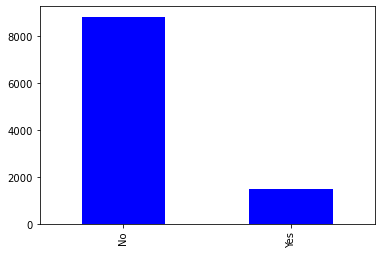

In [31]:
df['response'].value_counts().plot(kind='bar',color='blue')

# Show a plot of the rate of the response types by each Sales Channel.

<AxesSubplot:>

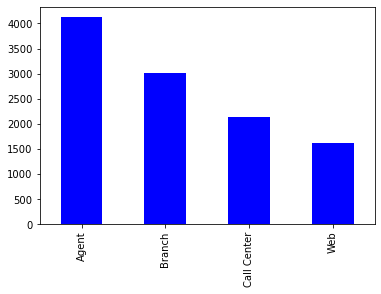

In [32]:
df['sales channel'].value_counts().plot(kind='bar',color='blue')

# Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here).
 

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt 

### boxplot

<AxesSubplot:xlabel='total claim amount', ylabel='response'>

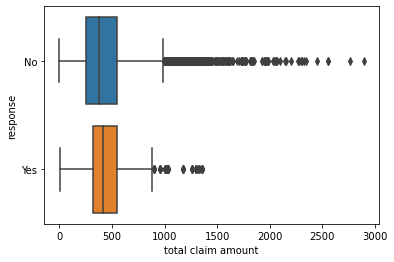

In [34]:
sns.boxplot(x="total claim amount", y="response", data=df)

### distribution plot 

<AxesSubplot:xlabel='total claim amount', ylabel='Count'>

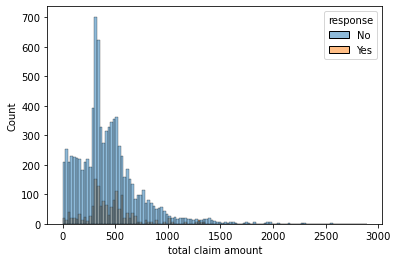

In [35]:
sns.histplot(df, x="total claim amount", hue="response")

# Create similar plots like in the task before, but for Income.


<AxesSubplot:xlabel='total claim amount', ylabel='income'>

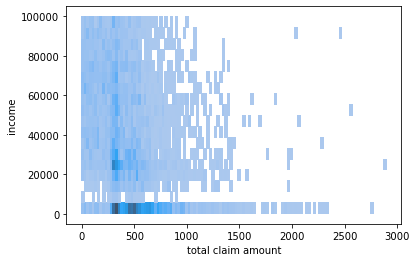

In [36]:
sns.histplot(df, x="total claim amount", y="income")

# Create a scatterplot between Total Claim Amount and Income. Play around with the settings of the scatterplot (markersize, alpha level, ...) and in doing so try to identify more features within the data just visually. You can also try different seaborn plots. Check for example this link which explains how to avoid overplotting.
 

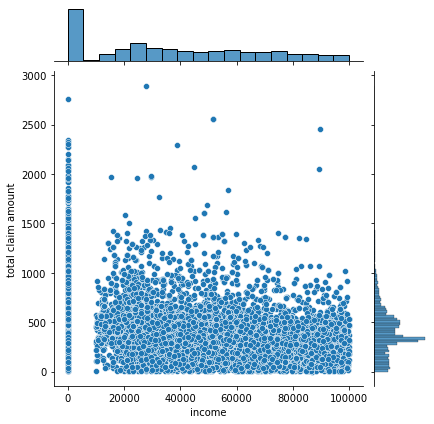

In [37]:
sns.jointplot(x=df['income'], y=df['total claim amount'])

# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively) 

In [38]:
dfnum.dtypes

NameError: name 'dfnum' is not defined

In [39]:
dfnum=df.select_dtypes(np.number)

In [40]:
df._get_numeric_data()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since policy inception,number of policies,total claim amount
0,0,4809.216960,48029,61,52,9,292.800000
1,1,2228.525238,0,64,26,1,744.924331
2,2,14947.917300,22139,100,31,2,480.000000
3,3,22332.439460,49078,97,3,2,484.013411
4,4,9025.067525,23675,117,31,7,707.925645
...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,40,7,1214.400000
10906,10906,5259.444853,61146,65,68,6,273.018929
10907,10907,23893.304100,39837,201,63,2,381.306996
10908,10908,11971.977650,64195,158,27,6,618.288849


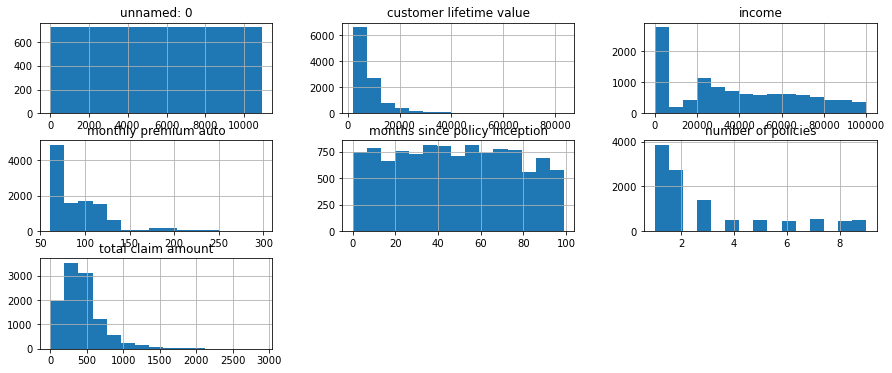

In [41]:
dfnum.hist(bins=15, figsize=(15, 6),);

In [42]:
catcols = df.select_dtypes(include='object')

In [43]:
catcols

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,months since last claim,number of open complaints,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,7.0,0.0,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,no response,2
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,3.0,0.0,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,no response,1
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,34.0,0.0,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,2
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,10.0,0.0,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,no response,no response,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,no response,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,no response,no response,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,7.0,0.0,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,11.0,0.0,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,no response,2
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,0.0,4.0,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,2


# Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution
 

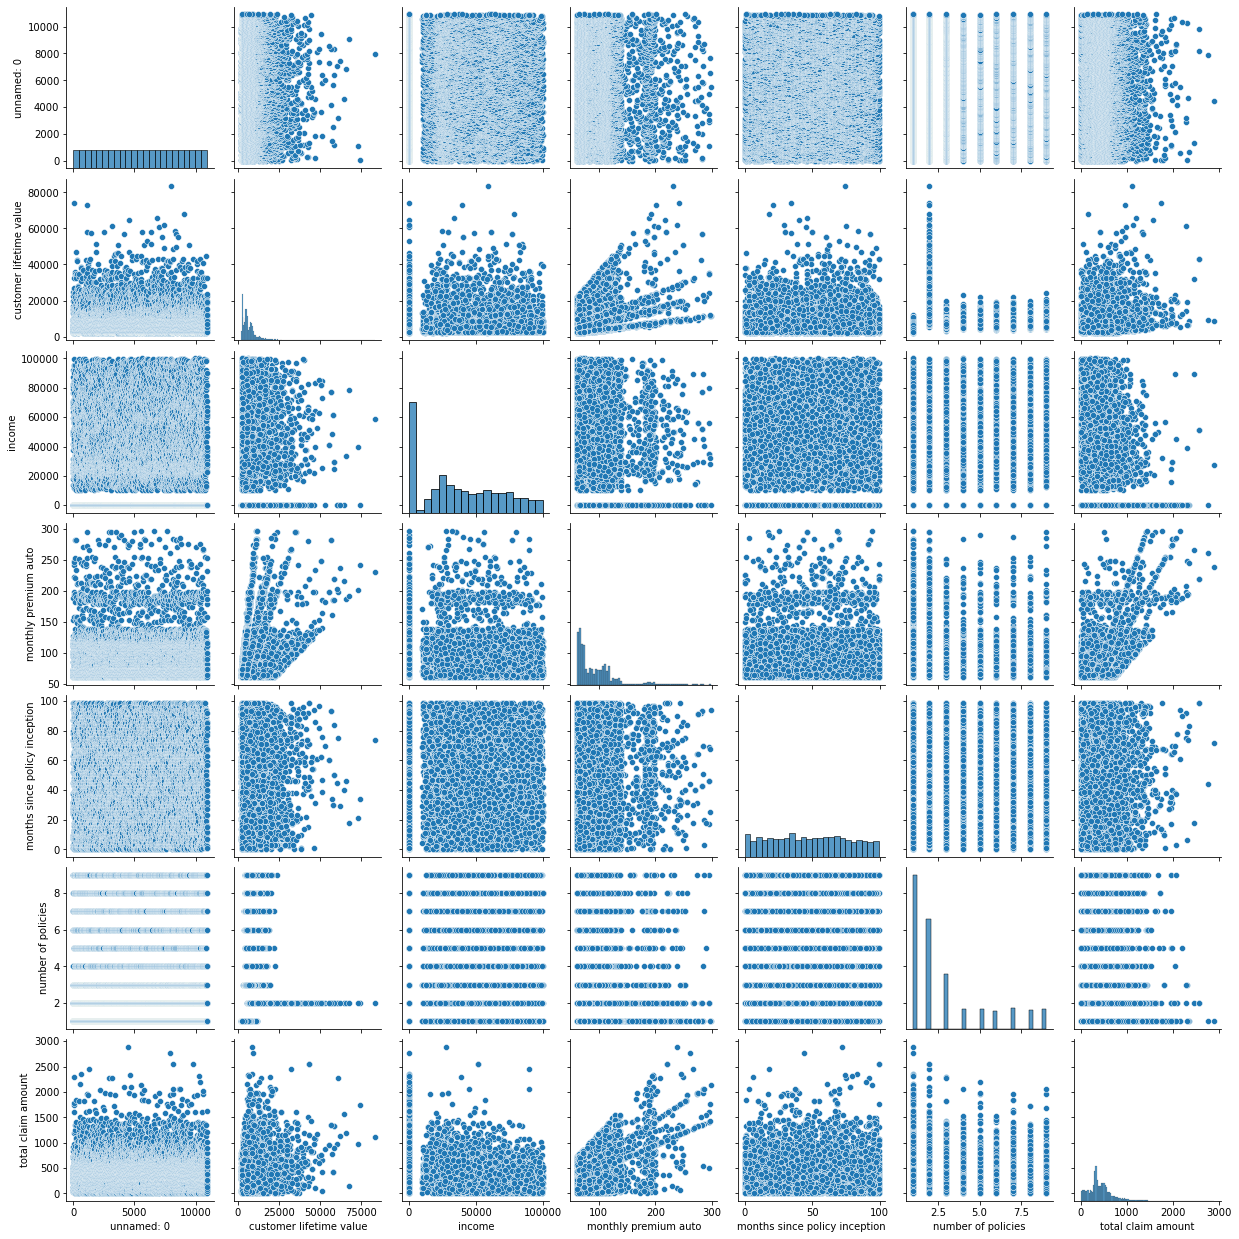

In [44]:
sns.pairplot(dfnum)

In [45]:
dfnum=dfnum.select_dtypes(np.number)

In [46]:
dfnum._get_numeric_data()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since policy inception,number of policies,total claim amount
0,0,4809.216960,48029,61,52,9,292.800000
1,1,2228.525238,0,64,26,1,744.924331
2,2,14947.917300,22139,100,31,2,480.000000
3,3,22332.439460,49078,97,3,2,484.013411
4,4,9025.067525,23675,117,31,7,707.925645
...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,40,7,1214.400000
10906,10906,5259.444853,61146,65,68,6,273.018929
10907,10907,23893.304100,39837,201,63,2,381.306996
10908,10908,11971.977650,64195,158,27,6,618.288849


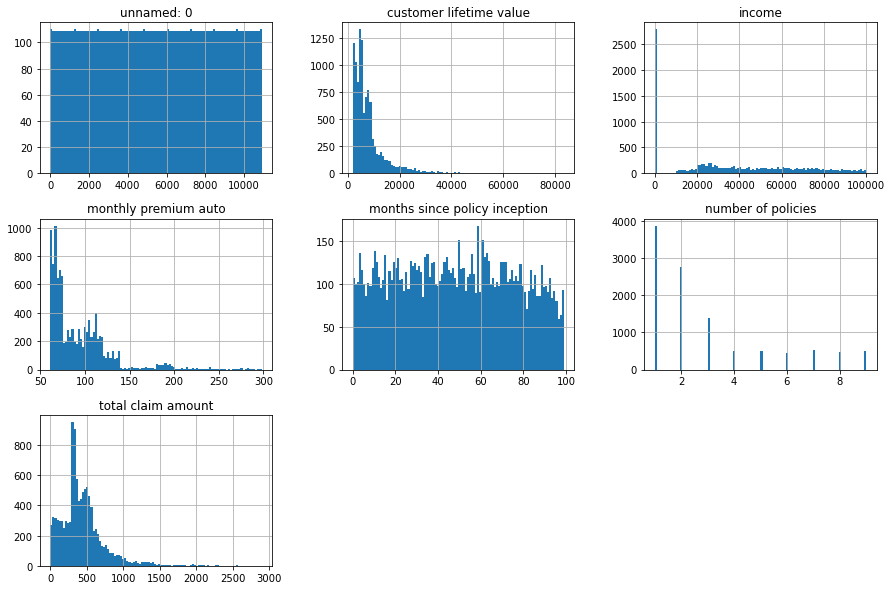

In [47]:
dfnum.hist(bins=100, figsize=(15, 10));

### Do the distributions for different numerical variables look like a normal distribution

- monthly premium, total claim amount and customer lifetime value are all Log Normal and skrew right
- months since policy inception and income is uniform
- number of policies is binomial and skrew right

# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.


In [48]:
corr_data = dfnum
correlations_matrix = corr_data.corr()
correlations_matrix

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since policy inception,number of policies,total claim amount
unnamed: 0,1.000000,0.001355,0.008910,0.000863,0.012795,0.002319,-0.000593
customer lifetime value,0.001355,1.000000,0.028306,0.403069,0.016960,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.005903,-0.009960,-0.354141
monthly premium auto,0.000863,0.403069,-0.009788,1.000000,0.018953,-0.020505,0.631799
months since policy inception,0.012795,0.016960,-0.005903,0.018953,1.000000,-0.009123,0.003095
number of policies,0.002319,0.016024,-0.009960,-0.020505,-0.009123,1.000000,-0.008923
total claim amount,-0.000593,0.232626,-0.354141,0.631799,0.003095,-0.008923,1.000000


# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features


<AxesSubplot:>

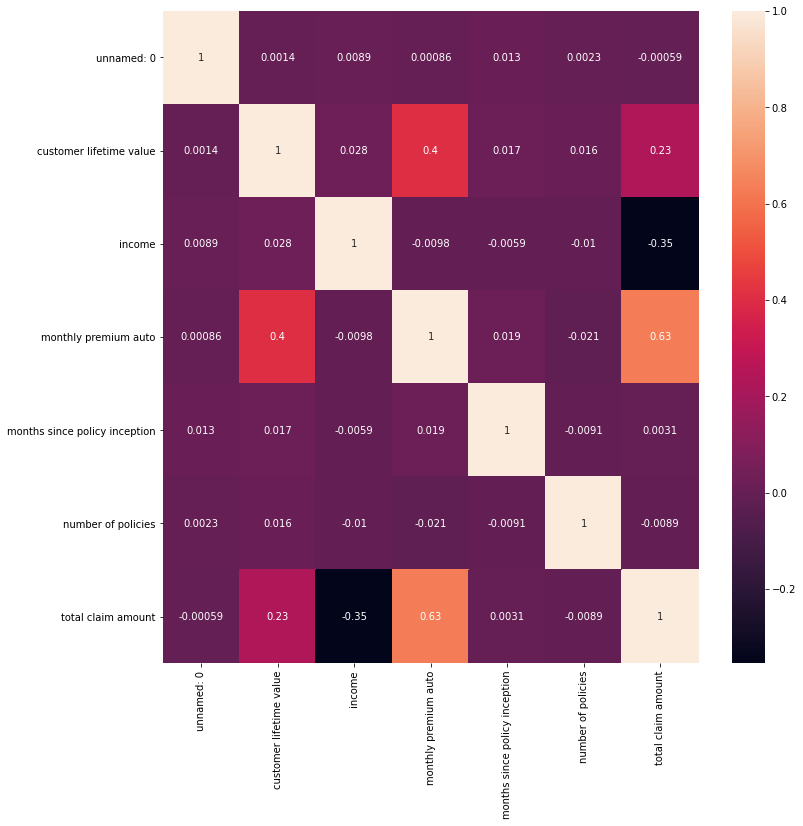

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations_matrix, annot=True)

# Lab | Predicting Claim Amount with ML Linear Regression

## 04 - Pre-Processing Data 
- Dealing with outliers. Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.
- Encoding Categorical Data fields using OHE.

- Bring categorical and numerical columns back together using pd.concat.

- Define X and y, the y value you are seeking to predict is claim amount.

- Splitting into train set and test dataset using random state, eg 80%:20% .



In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [51]:
#import the model from sklearn
from sklearn import linear_model
#import evaluation metrics from sklearn
from sklearn.metrics import mean_squared_error,r2_score
#import TTsplit from sklearn
from sklearn.model_selection import train_test_split

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer lifetime value        10910 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective to date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location code  

In [53]:
dfcat = df.select_dtypes(include = object)

In [54]:
dfcat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,months since last claim,number of open complaints,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,7.0,0.0,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,no response,2
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,3.0,0.0,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,no response,1
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,34.0,0.0,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,2
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,10.0,0.0,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,no response,no response,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,no response,1


In [55]:
dfnum = df.select_dtypes(include = np.number)

In [56]:
dfnum.head()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since policy inception,number of policies,total claim amount
0,0,4809.216960,48029,61,52,9,292.800000
1,1,2228.525238,0,64,26,1,744.924331
2,2,14947.917300,22139,100,31,2,480.000000
3,3,22332.439460,49078,97,3,2,484.013411
4,4,9025.067525,23675,117,31,7,707.925645


In [57]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(dfnum)
dfnum_normalized=transformer.transform(dfnum)
from pandas.plotting import scatter_matrix

In [58]:
dfnum_normalized

array([[0.00000000e+00, 9.96313198e-02, 9.95004529e-01, ...,
        1.07727072e-03, 1.86450702e-04, 6.06586284e-03],
       [4.25396711e-04, 9.48007306e-01, 0.00000000e+00, ...,
        1.10603145e-02, 4.25396711e-04, 3.16888360e-01],
       [7.48577167e-05, 5.59483479e-01, 8.28637495e-01, ...,
        1.16029461e-03, 7.48577167e-05, 1.79658520e-02],
       ...,
       [2.28570951e-01, 5.00716534e-01, 8.34838267e-01, ...,
        1.32025029e-03, 4.19127076e-05, 7.99080432e-03],
       [1.64749380e-01, 1.80819205e-01, 9.69571546e-01, ...,
        4.07795494e-04, 9.06212209e-05, 9.33834840e-03],
       [8.43946534e-01, 5.30514270e-01, 0.00000000e+00, ...,
        7.73624103e-05, 2.32087231e-04, 7.90426752e-02]])

In [59]:
dfnum=pd.DataFrame(X_normalized,columns=['unnamed: 0','customer lifetime value','income','monthly premium auto','months since policy inception','number of policies','total claim amount'])


NameError: name 'X_normalized' is not defined

### scatter_matrix(dfnum, alpha=0.2, figsize=(16,16), diagonal='kde');

In [60]:
#option 1 using OHE 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(dfnum)
encoded = encoder.transform(dfnum).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
y=df['total claim amount']

In [62]:
X=df.drop(['total claim amount'], axis=1)

In [66]:
from sklearn.preprocessing import MinMaxScaler
transformer=MinMaxScaler().fit(dfcat)[['effective to date']]
X_MinMax=transformer.transform(dfcat)[['effective to date']]

ValueError: could not convert string to float: 'DK49336'

# 05 - Modeling
- Apply linear regression model from sklearn.linear_model.

- Fit over your train data and predict against X test.

